# Activity 2.3 - CNN Network Architectures

**Name:** Tacsay, Marie Emmanuelle
<br> **Section:** CPE32S8
<br> **Instructor:** Engr. Roman Richard

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
#from scipy.ndimage import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [2]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [3]:
'''def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False '''

print('image saved')

image saved


* Test your function.
* Place a clock or any object
* Display the saved image

In [4]:
img_path = "webcam_test_img.png"

"""if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))"""

'if save_webcam_image(img_path) is False:\n    # Webcam not active, use the Dog Image\n    img_path = "rocking_chair.jpg"\n    print("Using the Test Rocking Chair Image: {}".format(img_path))'

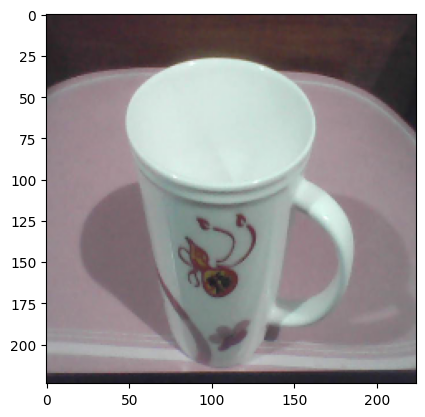

In [5]:
plt.imshow(plt.imread(img_path))

Use VGG-16 pre-trained model

In [6]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [7]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [8]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


Predicted Class           Name  Probability
0       n07930864            cup     0.535320
1       n03063599     coffee_mug     0.261747
2       n07920052       espresso     0.060862
3       n03733805  measuring_cup     0.027754
4       n04476259           tray     0.020558
5       n03063689      coffeepot     0.010050
6       n03950228        pitcher     0.009810
7       n07614500      ice_cream     0.009130
8       n04131690     saltshaker     0.007544
9       n07932039         eggnog     0.006526

Interpret the result of prediction using VGG16 model

**Analysis:** VGG16 is one of the common known CNN architecture that has a good performance in terms of processing and classifying images. Also, it is usually used for computer vision for it proved its performance in handling images and often used for detection, recognition and classification of images. VGG15 has 16 layers (that have weights). In addition, VGG16 has 13 convolutional layers 5 max pooling layers as well as 3 dense layers, summing up of 21 layers. In the case of this activity, the this CNN managed to recognize and predict the object emphasized on the photo. Based on the table above, VGG16 detected the object as the cup (the one obtained the highest probability) and coffee_mug (second to the highest that received probability). These results indicated that the model was somehow managed to have a performance through the result since the mentioned names achieved 53.53% and 26.17% probabilities, respectively. 

Use Resnet50 pretrained model

In [9]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [10]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Predicted Class            Name  Probability
0       n07930864             cup     0.414851
1       n04476259            tray     0.241900
2       n03063599      coffee_mug     0.217753
3       n03950228         pitcher     0.048715
4       n07920052        espresso     0.021336
5       n03063689       coffeepot     0.013904
6       n04560804       water_jug     0.011378
7       n04131690      saltshaker     0.006276
8       n04398044          teapot     0.006204
9       n03297495  espresso_maker     0.002521

Interpret the result using RESNET50 pretrained model

**Analysis:** Just like the VGG16, RESNET50 is also a pre-trained model in which can handle image for image classification. The architecture of the RESNET50 is different from the VGG16 for the prior model have 4 main parts namely, convolutional layer, identity block, convolutional bloc, and fully connected layer. However, this model was composed of too many layers which is evident when getting its summary. Based on the table above, the prediction of the RESNET50 is also the same as the VGG16 but, the probabilities for the names cup and coffee_mug is lower. It gains only a 41.49% for the cup and 21.78% for the coffee_mug.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

In [11]:
#effcientnetv2
from keras.applications import efficientnet_v2

efficientnetv2_model = efficientnet_v2.EfficientNetV2L(weights='imagenet')

efficientnetv2_model.summary() #model summary

Model: "efficientnetv2-l"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 480, 480,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 480, 480,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 240, 240,  │        864 │ rescaling[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 240, 240,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 240, 240,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 240, 240,  │      9,216 │ stem_activation[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 240, 240,  │        128 │ block1a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 240, 240,  │          0 │ block1a_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 240, 240,  │          0 │ block1a_project_… │
│                     │ 32)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 240, 240,  │      9,216 │ block1a_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 240, 240,  │        128 │ block1b_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 240, 240,  │          0 │ block1b_project_… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 240, 240,  │          0 │ block1b_drop[0][… │
│                     │ 32)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, 240, 240,  │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, 240, 240,  │        128 │ block1c_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, 240, 240,  │          0 │ block1c_project_

 Total params: 119,027,848 (454.06 MB)

 Trainable params: 118,515,272 (452.10 MB)

 Non-trainable params: 512,576 (1.96 MB)

**Analysis:** EfficientNetV2L is one of the CNNs architecture that are being used for the processing of data images. It has faster training speed and better parameter efficiency compared to the other models. This model is the upgraded version of the first version of EfficientNet in which it is more efficient and have good performance when it comes to processing data. This network is generated by using a combination of scaling (width, depth, and resolution) and neural architecture search. Also, the search space included new convolutional blocks such as Fused-MBConv. It is a long list of layers in order to build this kind of model which is evident when the summary of this model was called. It is because the layers were placed accordingly in order to achieve its purpose and will work well in thousand of data images.

In [12]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(480, 480)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [13]:
predict_image(efficientnetv2_model, img_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Predicted Class           Name  Probability
0       n07930864            cup     0.477090
1       n03063599     coffee_mug     0.288178
2       n07920052       espresso     0.013711
3       n04476259           tray     0.007905
4       n03733805  measuring_cup     0.005458
5       n03950228        pitcher     0.003552
6       n02909870         bucket     0.003465
7       n07932039         eggnog     0.002864
8       n03063689      coffeepot     0.002379
9       n04560804      water_jug     0.002000

**Analysis:** Based on the table above, the EfficientNetV2L was able to recognize the object shown on the photo above. It almost has the same results compared to VGG16 which the top two names are cup and coffee_mug. However, these two objects or names have a lower probabilities compared to VGG16 which are 47.71% (cup) and 28.82% (coffee_mug). It seems that the model was not able to recognize further the image which resulted to a lower probability.

In [14]:
#inception_resnetv2
from keras.applications import inception_resnet_v2

inception_resnetv2_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')

inception_resnetv2_model.summary() #model summary

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

**Analysis:** The model above is one of the CNNs that belongs to the Inception Family of architectures but it incorporates residual connections which is replacing the filter concatenation stage of the Inception Family. This model also have a long list of layers that make up its structure which explains why this model work efficiently even tho the data is millions of images and can still generate a good result. Inception ResNetV2 came from the Inception architecture family which means that it also adopts Inception modules together with residual connections, batch normalization, ReLU activation function, and reduction blocks.

In [15]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [16]:
predict_image(inception_resnetv2_model, img_path, inception_resnet_v2.preprocess_input, inception_resnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Predicted Class           Name  Probability
0       n07930864            cup     0.399144
1       n04476259           tray     0.398492
2       n03063599     coffee_mug     0.097167
3       n07920052       espresso     0.011540
4       n04560804      water_jug     0.010542
5       n03950228        pitcher     0.008957
6       n03063689      coffeepot     0.007132
7       n04398044         teapot     0.002710
8       n03733805  measuring_cup     0.002147
9       n07932039         eggnog     0.001806

**Analysis:** Based on the table above, the Inception ResNetV2 was able to recognize the object shown on the photo above. It almost has the same results compared to ResNet50 which the top one name is cup and the coffee_mug was only in the top three. However, these two objects or names have a lower probabilities compared to the previous models which are 39.91% (cup) and 9.72% (coffee_mug). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [17]:
#nasnet
from keras.applications import nasnet

nasnet_model = nasnet.NASNetLarge(weights='imagenet')

nasnet_model.summary() #model summary

Model: "NASNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 331, 331,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 165, 165,  │      2,592 │ input_layer_4[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 165, 165,  │        384 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_203      │ (None, 165, 165,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 165, 165,  │      4,032 │ activation_203[0… │
│ (Conv2D)            │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 165, 165,  │        168 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_204      │ (None, 165, 165,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_206      │ (None, 165, 165,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 169, 169,  │          0 │ activation_204[0… │
│ (ZeroPadding2D)     │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 171, 171,  │          0 │ activation_206[0… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 83, 83,    │      2,814 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 83, 83,    │      8,736 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 83, 83,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 83, 83,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_205      │ (None, 83, 83,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_207      │ (None, 83, 83,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 83, 83,    │      2,814 │ activation_205[0

 Total params: 88,949,818 (339.32 MB)

 Trainable params: 88,753,150 (338.57 MB)

 Non-trainable params: 196,668 (768.23 KB)

**Analysis:** NASNet or Neural Architecture Search is belong to the family of neural network architectures developed using neural architecture search or NAS. It is also one of the CNN architecture that is used to process data for image classification, detection, and recognition. Just like the previous models, NASNet also have a long list of layers when the .summay() function was called. It is because this model has a complex structure and has various layers that makes up its structure in order to serve its purpose and objectivity. Its building blocks is composed of normal and reduction cells. It is typically consist of repeating cells that are stacked to form the overall network. These cells are designed to be modular and contain convolutional operations, pooling operations, and skip connections. It is known for its state-of-the-art performance for it is used for millions of data showcasing its potential in processing and creating neural networks.

In [18]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(331, 331)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [19]:
predict_image(nasnet_model, img_path, nasnet.preprocess_input, nasnet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Predicted Class           Name  Probability
0       n03063599     coffee_mug     0.496631
1       n07930864            cup     0.335818
2       n07920052       espresso     0.005067
3       n03733805  measuring_cup     0.004277
4       n03063689      coffeepot     0.003521
5       n04476259           tray     0.002845
6       n04398044         teapot     0.002186
7       n03950228        pitcher     0.001968
8       n07932039         eggnog     0.001407
9       n04263257      soup_bowl     0.001373

**Analysis:** Based on the table above, the NASNet was able to recognize the object shown on the photo above. This model identify that the object seen in the photo is a coffee mug because based on the table above, the top one name or object recognized by the model is coffee)mug with a 49.66% probability. This result proves that the model used is good in classifying and recognizing objects. The top two is cup with the probability of 33.58% which is a good indication that the model can recognize the specified object shown in the photo. However, the probabilities are still low which means that the model wasn't able to process and recognize well the object emphasized on the photo.

In [20]:
#densenet
from keras.applications import densenet

densenet_model = densenet.DenseNet201(weights='imagenet')

densenet_model.summary() #model summary

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

**Analysis:** DenseNet or Densely Connected Convolutional Network is one of the CNNs used just like the previous pre-trained models used for this activity. This model addresses some limitations of traditional convolutional neural networks such as the degradation problem wherein adding more layers can lead to diminishing performance. Also, this model was designed for a feed-forward operation where each layer is connected to every other layer which describes a feed-forward fashion within dense blocks. These dense blocks are composed of multiple convolutional layers, which are followed by a batch normalization and ReLU activation function. In addition, this model also has traditional layer which is composed of convolitional, pooling, and dimensionality reduction operations. These traditional layers were linked with dense blocks which reduced the spatial dimensions of feature maps and control the number of feature maps to manage the computational costs. With these characteristics of the model, DenseNet, it proved the long list of layers when .summary() is called just like the other CNNs models used above.

In [21]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [22]:
predict_image(densenet_model, img_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Predicted Class        Name  Probability
0       n07930864         cup     0.771274
1       n03063599  coffee_mug     0.190496
2       n07920052    espresso     0.027624
3       n04476259        tray     0.005882
4       n04131690  saltshaker     0.000646
5       n03950228     pitcher     0.000564
6       n07932039      eggnog     0.000498
7       n04263257   soup_bowl     0.000425
8       n03063689   coffeepot     0.000357
9       n07584110    consomme     0.000232

**Analysis:** Based on the table above, the DenseNet was able to recognize the object shown on the photo above. It almost has the same results compared to the previous used CNNs models in which the top one name is cup and the coffee_mug was only in the top three. However, the probability obtained by this model is much higher compared to the probabilities gained by the other models. The probability of the top one name or object recognized by the model, which is the cup, is 77.12%. While the top two gained a probability of 19.05%. Based on the results, DenseNet was able to further recognize the object emphasized on the photo which gives a much higher result or probability when compared to the other models. It can be concluded that this model can work well with data images in terms of processing, classification, detection, and recognition.

## **Saved Image**

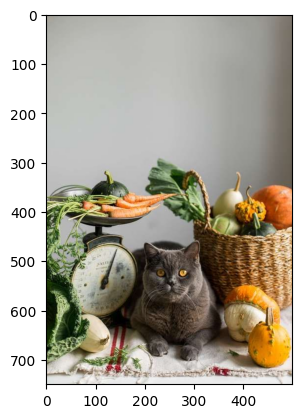

In [23]:
#image1
image_path = (r"C:\Users\emtac\Documents\ComVisionMats\trial_img.jpg")

plt.imshow(plt.imread(image_path))

In [24]:
#vgg16
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')

In [25]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [26]:
#predict the image
predict_image(vgg16_model, image_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


Predicted Class             Name  Probability
0       n03482405           hamper     0.134415
1       n04476259             tray     0.083137
2       n03201208     dining_table     0.054913
3       n02699494            altar     0.048265
4       n03950228          pitcher     0.037478
5       n03018349    china_cabinet     0.023271
6       n04398044           teapot     0.023167
7       n03179701             desk     0.021647
8       n02123045            tabby     0.021170
9       n04204238  shopping_basket     0.020730

**Analysis:** Based on the table above, the VGG16 was able to recognize the object shown on the photo above. It recognized some of the objects in the photo such as the dining table, tabby (cat), and the shopping basket. However, these three objects or names have a lower probabilities compared to the previous models which are 5.49% (dining_table), 2.12% (tabby), and 2.07% (shopping_basket). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [27]:
#efficientnetv2
from keras.applications import efficientnet_v2

efficientnetv2_model = efficientnet_v2.EfficientNetV2L(weights='imagenet')

In [28]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(480, 480)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [29]:
#predict the image
predict_image(efficientnetv2_model, image_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Predicted Class              Name  Probability
0       n04141975             scale     0.265041
1       n07714571      head_cabbage     0.190468
2       n04204238   shopping_basket     0.089827
3       n07716906  spaghetti_squash     0.054446
4       n03482405            hamper     0.033553
5       n07718472          cucumber     0.028586
6       n07717556  butternut_squash     0.027744
7       n02123045             tabby     0.027482
8       n07717410      acorn_squash     0.025979
9       n07716358          zucchini     0.015807

**Analysis:** Based on the table above, the EffcientNetV2 was able to recognize the object shown on the photo above. It recognized some of the objects in the photo such as the scale, butternut squash, acorn squash, tabby (cat), and the shopping basket. However, these five objects or names have a lower probabilities compared to the previous models which are 26.50% (scale), 8.98% (shopping_basket), 2.77% (butternut_squash), 2.75% (tabby), and 2.60% (acorn_squash). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [30]:
#inception_resnetv2
from keras.applications import inception_resnet_v2

inception_resnetv2_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')

In [31]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [32]:
#predict the image
predict_image(inception_resnetv2_model, image_path, inception_resnet_v2.preprocess_input, inception_resnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Predicted Class             Name  Probability
0       n03482405           hamper     0.436970
1       n04399382            teddy     0.038246
2       n02708093     analog_clock     0.036950
3       n03201208     dining_table     0.030523
4       n04548280       wall_clock     0.020079
5       n04204238  shopping_basket     0.015544
6       n04409515      tennis_ball     0.013841
7       n04141975            scale     0.007502
8       n02123045            tabby     0.007108
9       n02794156        barometer     0.006617

**Analysis:** Based on the table above, the Inception ResNetV2 was able to recognize the object shown on the photo above. It recognized some of the objects in the photo such as the dining table, shopping basket, scale, and tabby (cat). However, these four objects or names have a lower probabilities compared to the previous models which are 3.05% (dining_table), 1.55% (shopping_basket), 0.750% (scale), and 0.711% (tabby). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [33]:
#nasnet
from keras.applications import nasnet

nasnet_model = nasnet.NASNetLarge(weights='imagenet')

In [34]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(331, 331)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [35]:
#predict the image
predict_image(nasnet_model, image_path, nasnet.preprocess_input, nasnet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Predicted Class          Name  Probability
0       n02123045         tabby     0.149149
1       n03201208  dining_table     0.064919
2       n03950228       pitcher     0.055421
3       n03991062           pot     0.044275
4       n03786901        mortar     0.026405
5       n07717410  acorn_squash     0.026243
6       n03482405        hamper     0.025569
7       n02124075  Egyptian_cat     0.025336
8       n04522168          vase     0.022995
9       n07718472      cucumber     0.019749

**Analysis:** Based on the table above, the NASNet was able to recognize the object shown on the photo above. It recognized some of the objects in the photo such as the tabby (cat), dining table, and acorn squash. However, these three objects or names have a higher probabilities compared to the previous models which are 14.91% (tabby), 6.49% (dining_table), and 2.62% (acorn_squash). This model seems to be the first one to achieved higher probability when compared to the previous models but still it seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [36]:
#densenet
from keras.applications import densenet

densenet_model = densenet.DenseNet201(weights='imagenet')

In [37]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [38]:
#predict the image
predict_image(densenet_model, image_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Predicted Class          Name  Probability
0       n03201208  dining_table     0.138068
1       n02123045         tabby     0.081968
2       n04522168          vase     0.073376
3       n03482405        hamper     0.059536
4       n03991062           pot     0.045626
5       n03950228       pitcher     0.041796
6       n04398044        teapot     0.034920
7       n03179701          desk     0.032977
8       n03794056     mousetrap     0.030136
9       n04560804     water_jug     0.018901

**Analysis:** Based on the table above, the DenseNet was able to recognize the object shown on the photo above. It recognized some of the objects in the photo such as the dining table and tabby (cat). However, these top two objects or names have a lower probabilities compared to the previous models which are 13.81% (dining_table) and 8.20% (tabby). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

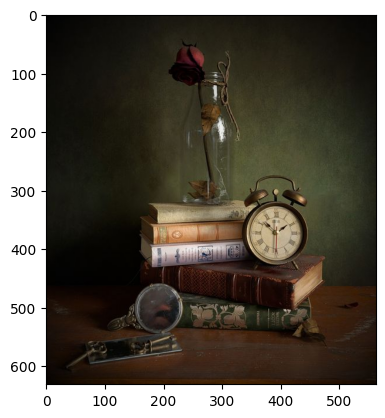

In [39]:
#image2
image_path = (r"C:\Users\emtac\Documents\ComVisionMats\trial_img2.jpg")

plt.imshow(plt.imread(image_path))

In [40]:
#vgg16
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')

In [41]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [42]:
#predict the image
predict_image(vgg16_model, image_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


Predicted Class            Name  Probability
0       n04141975           scale     0.287728
1       n04179913  sewing_machine     0.249112
2       n03014705           chest     0.129506
3       n04125021            safe     0.018844
4       n04033901           quill     0.017172
5       n02794156       barometer     0.016745
6       n02699494           altar     0.013105
7       n02708093    analog_clock     0.011772
8       n03916031         perfume     0.011618
9       n04041544           radio     0.011508

**Analysis:** Based on the table above, the VGG16 was able to recognize one of the objects shown on the photo above. It recognized one object in the photo and it is the analog clock. However, this object or names have a lower probability which is only a 1.18% (analog_clock). It seems that the model was not able to recognize further the image which resulted to a much lower probability.

In [43]:
#efficientnetv2
from keras.applications import efficientnet_v2

efficientnetv2_model = efficientnet_v2.EfficientNetV2L(weights='imagenet')

In [44]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(480, 480)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [45]:
#predict the image
predict_image(efficientnetv2_model, image_path, efficientnet_v2.preprocess_input, efficientnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


Predicted Class          Name  Probability
0       n04328186     stopwatch     0.272315
1       n02708093  analog_clock     0.142311
2       n03544143     hourglass     0.058203
3       n02794156     barometer     0.054048
4       n04380533    table_lamp     0.035353
5       n04141975         scale     0.033363
6       n04033901         quill     0.025417
7       n04522168          vase     0.022113
8       n02870880      bookcase     0.015935
9       n04548280    wall_clock     0.010291

**Analysis:** Based on the table above, the EfficientNetV2L was able to recognize one of the objects shown on the photo above. It recognized one object in the photo and it is the analog clock. However, this object or names have a low probability which is only a 14.23% (analog_clock). It seems that the model was not able to recognize further the image which resulted to a low probability.

In [46]:
#inception_resnetv2
from keras.applications import inception_resnet_v2

inception_resnetv2_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')

In [47]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(299, 299)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [48]:
#predict the image
predict_image(inception_resnetv2_model, image_path, inception_resnet_v2.preprocess_input, inception_resnet_v2.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


Predicted Class              Name  Probability
0       n04328186         stopwatch     0.409090
1       n02708093      analog_clock     0.264033
2       n04141975             scale     0.074862
3       n02794156         barometer     0.064300
4       n04548280        wall_clock     0.015796
5       n04380533        table_lamp     0.010408
6       n03706229  magnetic_compass     0.008790
7       n03637318         lampshade     0.003455
8       n03196217     digital_clock     0.003315
9       n04179913    sewing_machine     0.002699

**Analysis:** Based on the table above, the Inception ResNetV2 was able to recognize one of the objects shown on the photo above. It recognized one object in the photo and it is the analog clock. However, this object or names have a low probability which is only a 26.40% (analog_clock). This model is so far the one that achieved a high probability compared to the other models used to process the images. It seems that the model was not able to recognize further the image which resulted to a low probability.

In [49]:
#nasnet
from keras.applications import nasnet

nasnet_model = nasnet.NASNetLarge(weights='imagenet')

In [50]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(331, 331)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [51]:
#predict the image
predict_image(nasnet_model, image_path, nasnet.preprocess_input, nasnet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Predicted Class              Name  Probability
0       n02708093      analog_clock     0.442100
1       n04328186         stopwatch     0.188406
2       n04380533        table_lamp     0.065626
3       n04548280        wall_clock     0.050376
4       n02794156         barometer     0.029347
5       n03544143         hourglass     0.025958
6       n03179701              desk     0.011708
7       n03706229  magnetic_compass     0.008928
8       n02870880          bookcase     0.008014
9       n03637318         lampshade     0.007407

**Analysis:** Based on the table above, the NASNet was able to recognize one of the objects shown on the photo above. It recognized one object in the photo and it is the analog clock. However, this object or names have a low probability which is only a 44.21% (analog_clock). This model is so far the one that achieved a high probability compared to the other models used to process the images. But, it seems that the model was not able to recognize further the image which resulted to a low probability.

In [52]:
#densenet
from keras.applications import densenet

densenet_model = densenet.DenseNet201(weights='imagenet')


In [53]:
def predict_image(model, image_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

In [54]:
#predict the image
predict_image(densenet_model, image_path, densenet.preprocess_input, densenet.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


Predicted Class            Name  Probability
0       n02708093    analog_clock     0.453551
1       n04328186       stopwatch     0.118418
2       n03187595  dial_telephone     0.087983
3       n04548280      wall_clock     0.085105
4       n02794156       barometer     0.059418
5       n04141975           scale     0.049270
6       n03697007      lumbermill     0.028346
7       n03196217   digital_clock     0.012687
8       n04179913  sewing_machine     0.009205
9       n03544143       hourglass     0.005962

**Analysis:** Based on the table above, the DenseNet was able to recognize one of the objects shown on the photo above. It recognized one object in the photo and it is the analog clock. However, this object or names have a low probability which is only a 45.36% (analog_clock). This model is so far the one that achieved the highest probability compared to the other models used to process the images. But, it seems that the model was not able to recognize further the image which resulted to a low probability.

#### Conclusion

In this activity, we were introduced to the various pre-trained model available in keras module. Each model has their own characteristics and architecture that make them unique and have their own performances when processing, classifying, detecting, and recognizing images. Using them in processing images would be a big help in recognizing their performances as well as to comparing them. The models used in this activity have their own performances when processing the used image. Based on the results, among from EfficientNetV2L, Inception ResNetV2, NASNet, DenseNet,DenseNet obtained the highest probability in recognizing the objects in an image which is proven based on the table generated. In addition, the table generated by each model shows that some of them may not perform well because of the quality of the photo (especially the photo caught by camera) or the architecture of the model itself. To illustrate, VGG16 has a poor performance when recognizing objects in the saved images. It may be because of the image for some of the objects have the same color palette that the model may overlook. Even though there are various reasons why the model's accuracy in recognizing objects, it is still important that the model still recognize the objects and was able to have predictions through generating a table. These complex models are still used in order to process images and for image recognition for computer vision. These models are just a fraction of the models available in keras and there are still models that can be use and can surpass the models used in this activity. Overall, understanding and observing these models would be a big help in further understanding deep learning and how it can be a big advantage for us especially in creating efficient models.

**Honor Pledge: “I affirm that I shall not give or receive any unauthorized help on this assignment and that all work is my own.”**

Google Colab Link: https://colab.research.google.com/drive/1JLABSTXSf-N_RS0eof2azlzAfDDCTPxW?usp=sharing